In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=00b5f4c412553f946ed2a4b7a9dcba3a0905394b553927dd8a891066e50a2733
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
import numpy as np
from skimage.segmentation import mark_boundaries
from lime import lime_image
from skimage.io import imread
import matplotlib.pyplot as plt
import cv2

In [ ]:
import tensorflow as tf

In [ ]:
github_model_url = "https://raw.githubusercontent.com/ShreyashSomvanshi/test_synthcheck/main/firstModel.h5"
import requests
# Download the model file
response = requests.get(github_model_url)
with open("firstModel.h5", "wb") as f:
    f.write(response.content)


In [ ]:
model = tf.keras.models.load_model('/content/firstModel.h5')

In [ ]:
# Load an example image
img = imread('/content/download.jpeg')

# path = '/content/download.jpeg'

def preddd(img):
  # img = cv2.imread(path)
  # Check if the image is loaded successfully
  # if img is None:
  #   raise FileNotFoundError(f"Could not read the image from {image_path}")
  # Convert from BGR to RGB
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  resize = tf.image.resize(img, (32, 32))
  y_pred = model.predict(np.expand_dims(resize/255, 0))
  return y_pred

# Define a function that takes an image as input and outputs the predicted class probabilities
def predict_fn(images):
    # Your binary image classification model prediction code here
    # This function should take an image or a batch of images as input and return the predicted class probabilities
    pass



In [ ]:
preddd(img)

1/1 [==============================] - 0s 24ms/step


array([[0.9999732]], dtype=float32)

In [ ]:
# Create the LIME explainer
explainer = lime_image.LimeImageExplainer()

# Explain the prediction for the example image
explanation = explainer.explain_instance(img, preddd, top_labels=1, hide_color=0, num_samples=1)


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 [==============================] - 0s 49ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


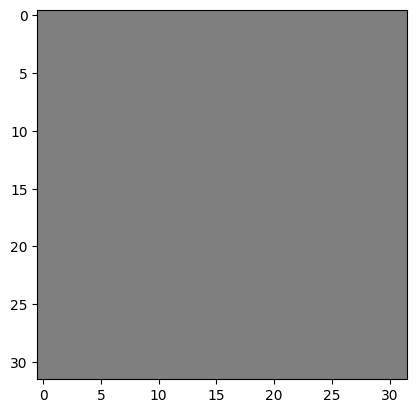

In [ ]:

# Display the explanation
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.show()

In [ ]:
# def preddd(path):
#   img = cv2.imread(path)
#   # Check if the image is loaded successfully
#   if img is None:
#     raise FileNotFoundError(f"Could not read the image from {image_path}")
#   # Convert from BGR to RGB
#   img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#   resize = tf.image.resize(img, (32, 32))
#   y_pred = model.predict(np.expand_dims(resize/255, 0))
#   if y_pred > 0.5:
#       print(f'Predicted class: REAL')
#   else:
#       print(f'Predicted class: SYNTHETIC')

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 8.0 MB/s eta 0:00:00


In [ ]:
import numpy as np
import shap
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
import matplotlib.pyplot as plt

# Load your binary image classification model (e.g., VGG16)
model = VGG16(weights='imagenet', include_top=True)

# Define a function to preprocess the input image for the model
def preprocess_image(image):
    img = np.expand_dims(image, axis=0)
    img = preprocess_input(img)
    return img


553467096/553467096 [==============================] - 11s 0us/step


In [ ]:
# Load an example image
image = np.random.rand(32, 32, 3)  # Example input image


In [ ]:

# Preprocess the image
processed_image = preprocess_image(image)

# Convert the NumPy array to a list
processed_image_list = processed_image.tolist()

# Create an "explainer" object using the SHAP library
explainer = shap.Explainer(model, preprocess_input)

shap_values = explainer([processed_image_list], max_evals=6145)

# Calculate SHAP values for the example image
# shap_values = explainer(processed_image)

# Visualize the SHAP values
shap.image_plot(shap_values, processed_image, show=False)
plt.show()


AttributeError: 'list' object has no attribute 'shape'

In [ ]:
!pip install -q streamlit

In [ ]:
!pip install lime

In [ ]:
# %%writefile app.py

# import streamlit as st

# st.write('Hello, *World!* :sunglasses:')

Writing app.py


In [ ]:
# %%writefile app1.py

# import streamlit as st
# import numpy as np
# from skimage.segmentation import mark_boundaries
# from lime import lime_image
# from skimage.io import imread
# import matplotlib.pyplot as plt

# # Load an example image
# img = imread('example_image.jpg')

# # Define a function that takes an image as input and outputs the predicted class probabilities
# def predict_fn(images):
#     # Your binary image classification model prediction code here
#     # This function should take an image or a batch of images as input and return the predicted class probabilities
#     pass

# # Create the LIME explainer
# explainer = lime_image.LimeImageExplainer()

# # Explain the prediction for the example image
# explanation = explainer.explain_instance(img, predict_fn, top_labels=1, hide_color=0, num_samples=1)  # Update num_samples to 1

# # Display the explanation
# temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)

# # Streamlit app
# st.title('LIME Image Explanation')
# st.image(mark_boundaries(temp / 2 + 0.5, mask), caption='LIME Image Explanation')

# if st.button('Results'):
#     st.write('Showing LIME Image Explanation')
#     st.image(mark_boundaries(temp / 2 + 0.5, mask), caption='LIME Image Explanation')


Writing app1.py


In [ ]:
%%writefile app.py
import streamlit as st
import numpy as np
from skimage.segmentation import mark_boundaries
from lime import lime_image
from skimage.io import imread
import matplotlib.pyplot as plt

# Function to load and preprocess the uploaded image
def load_image(image_file):
    img = imread(image_file)
    return img

# Create the LIME explainer
explainer = lime_image.LimeImageExplainer()

# Streamlit app
st.title('LIME Image Explanation')

# Image uploader
uploaded_image = st.file_uploader("Upload an image", type=["jpg", "jpeg", "png"])

if uploaded_image is not None:
    # Load and preprocess the uploaded image
    img = load_image(uploaded_image)

    # Define a function that takes an image as input and outputs the predicted class probabilities
    def predict_fn(images):
        # Your binary image classification model prediction code here
        # This function should take an image or a batch of images as input and return the predicted class probabilities
        pass

    # Explain the prediction for the uploaded image
    explanation = explainer.explain_instance(img, predict_fn, top_labels=1, hide_color=0, num_samples=1)

    # Display the explanation
    temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)

    st.image(mark_boundaries(temp / 2 + 0.5, mask), caption='LIME Image Explanation')

    if st.button('Results'):
        st.write('Showing LIME Image Explanation')
        st.image(mark_boundaries(temp / 2 + 0.5, mask), caption='LIME Image Explanation')


Writing app.py


In [ ]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
updated 1 package and audited 36 packages in 0.625s

3 packages are looking for funding
  run `npm fund` for details

found 2 moderate severity vulnerabilities
  run `npm audit fix` to fix them, or `npm audit` for details


In [ ]:
import urllib
print("Password/Enpoint IP for localtunnel is:",urllib.request.urlopen('https://ipv4.icanhazip.com').read().decode('utf8').strip("\n"))

Password/Enpoint IP for localtunnel is: 35.196.12.177


In [ ]:
!streamlit run app.py &>/content/logs.txt &

In [ ]:
!npx localtunnel --port 8501

npx: installed 22 in 2.381s
your url is: https://great-eagles-occur.loca.lt
^C
